In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

train_file_path = "D:\学习资料\财经数据分析实践\回归分析实践\data\\train.csv"
test_file_path = "D:\学习资料\财经数据分析实践\回归分析实践\data\\test.csv"

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)


test表审核

In [4]:
#   数据统计——是否存在空缺值
data_0211443 = test_data.isnull().sum()
list_index = data_0211443[data_0211443!=0].index
print("字段\t\t\t缺失数量")
for index in list_index:
    print(index,"：",data_0211443[index])


字段			缺失数量
MSZoning ： 4
LotFrontage ： 227
Alley ： 1352
Utilities ： 2
Exterior1st ： 1
Exterior2nd ： 1
MasVnrType ： 894
MasVnrArea ： 15
BsmtQual ： 44
BsmtCond ： 45
BsmtExposure ： 44
BsmtFinType1 ： 42
BsmtFinSF1 ： 1
BsmtFinType2 ： 42
BsmtFinSF2 ： 1
BsmtUnfSF ： 1
TotalBsmtSF ： 1
BsmtFullBath ： 2
BsmtHalfBath ： 2
KitchenQual ： 1
Functional ： 2
FireplaceQu ： 730
GarageType ： 76
GarageYrBlt ： 78
GarageFinish ： 78
GarageCars ： 1
GarageArea ： 1
GarageQual ： 78
GarageCond ： 78
PoolQC ： 1456
Fence ： 1169
MiscFeature ： 1408
SaleType ： 1


                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

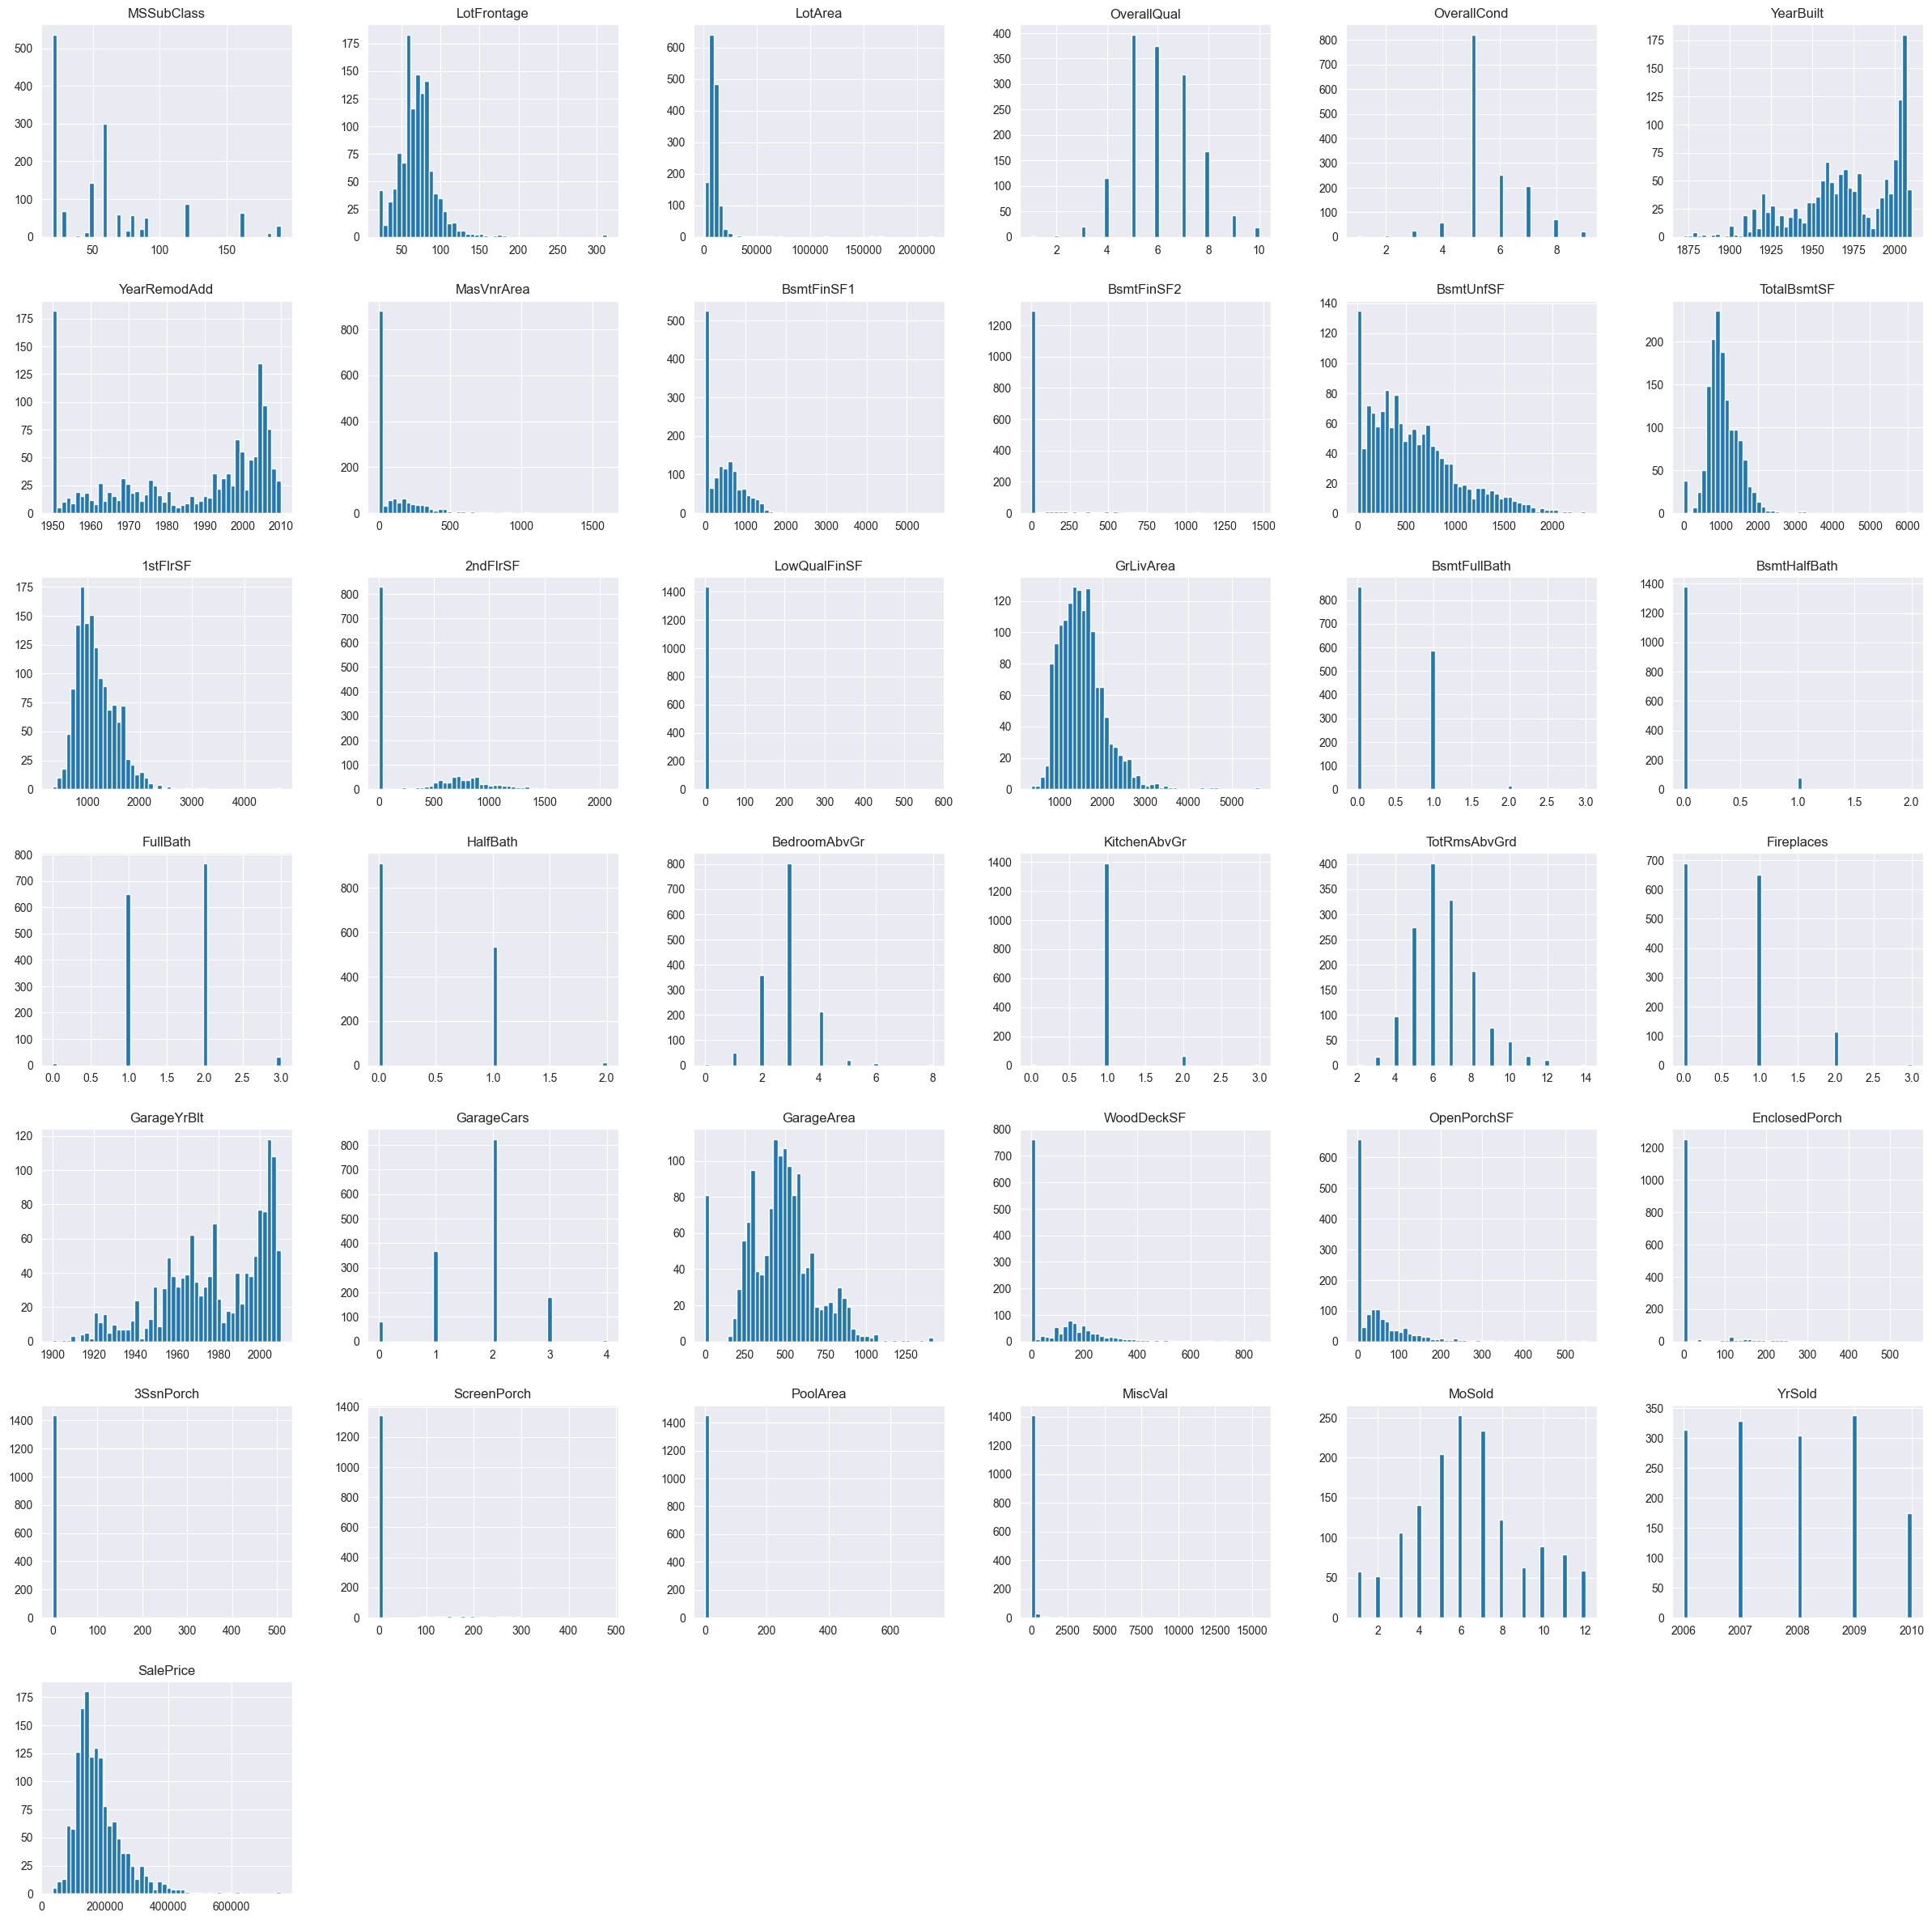

In [5]:
print(test_data.describe())
#   绘制每个数值的直方图。直方图横轴表示数值范围，纵轴表示实例数量。
somedata_0211443 = train_data.drop(columns=['Id'])
somedata_0211443.select_dtypes(include=['float','int']).hist(bins=50,figsize=(30,30))


In [6]:
train_data_0211443 = train_data
test_data_0211443 = test_data

In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
display(train_data.shape)
display(test_data.shape)

(1460, 81)

(1459, 80)

In [10]:
# 数值型数据的分布情况
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# 查看特征字段
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# 查看数据信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
# 查看数据标签分布情况
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

房价没有空缺值，平均价格为18.0921万$，最小值为3.49万$，最大值为75.5万$

In [14]:
# 选择数值类型的属性
numeric_features = train_data.select_dtypes(include=['int64', 'float64'])

# 计算数值属性与SalePrice之间的相关性
correlation = numeric_features.corrwith(train_data['SalePrice']).abs().sort_values(ascending=False)

# 选择前四个最高的属性
top_four_numeric_features = correlation.index[1:10]

print("与SalePrice相关性最高的十个数值属性：", top_four_numeric_features)


与SalePrice相关性最高的十个数值属性： Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


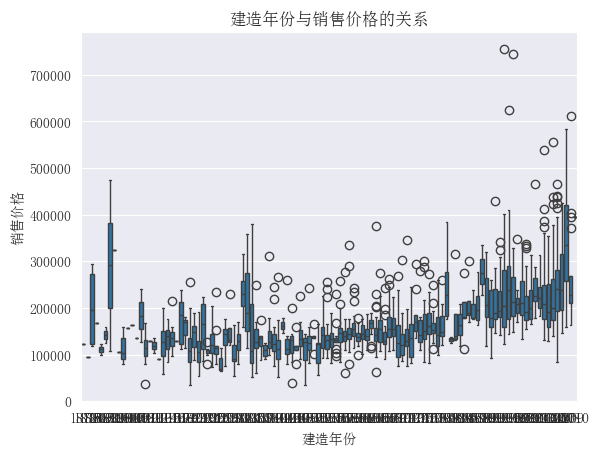

In [15]:
plt.rcParams['font.family'] = 'SimSun' 

sns.boxplot(x=train_data['YearBuilt'], y=train_data['SalePrice'])

plt.title('建造年份与销售价格的关系')
plt.xlabel('建造年份')
plt.ylabel('销售价格')

plt.show()

由于建造年份 (YearBuilt) 这个特征存在较多的取值 (从1872年到2010年)，直接one hot encoding会造成过于稀疏的数据，因此在特征工程中会将其进行数字化编码 (LabelEncoder) 。

标签编码（LabelEncoder）：
标签编码适用于分类变量的取值有序的情况，它将每个类别映射到一个整数，从0到类别数量减1。
例如，如果一个分类变量有"red"、"green"和"blue"三个类别，标签编码将它们分别映射为0、1和2。
在Python中，可以使用sklearn.preprocessing.LabelEncoder来进行标签编码。

独热编码（OneHotEncoder）：
独热编码适用于分类变量的取值无序的情况，它将每个类别转换为一个二进制的向量，其中只有一个元素是1，其余元素是0。
例如，对于前述的"red"、"green"和"blue"三个类别，独热编码将它们分别转换为[1, 0, 0]、[0, 1, 0]和[0, 0, 1]。
在Python中，可以使用sklearn.preprocessing.OneHotEncoder来进行独热编码。
在使用独热编码时，需要注意以下几点：

对于大规模的分类变量，独热编码会引入大量的稀疏矩阵，增加模型的复杂度和训练时间。
如果类别数量较多，可以考虑使用标签编码，或者对类别数量较多的特征进行特征降维。

数据清洗

异常值处理

OverallQual、YearBuilt、TotalBsmtSF、 GrLivArea四个变量和目标值之间的关系绘制散点图检查异常值点
OverallQual: 给房屋整体材料和装修评分
YearBuilt: 建造日期
TotalBsmtSF: 地下室总面积
GrLivArea: 高于（地面）居住面积的平方英尺

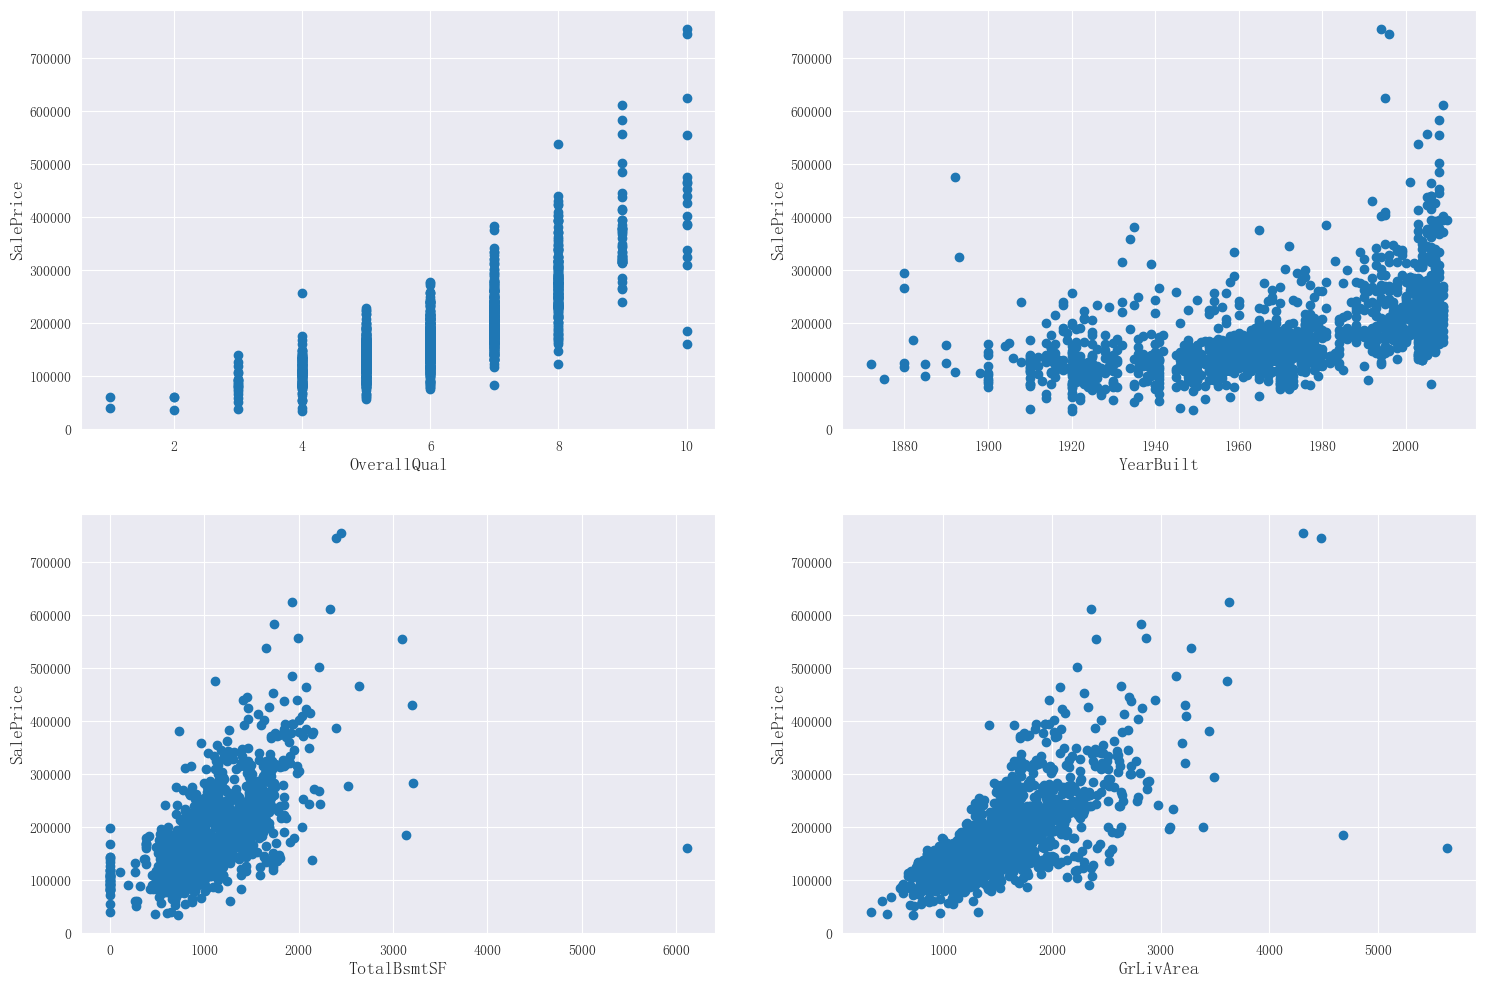

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
plt.scatter(x=train_data.OverallQual, y=train_data.SalePrice)
plt.xlabel("OverallQual", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 2)
plt.scatter(x=train_data.YearBuilt, y=train_data.SalePrice)
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 3)
plt.scatter(x=train_data.TotalBsmtSF, y=train_data.SalePrice)
plt.xlabel("TotalBsmtSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 4)
plt.scatter(x=train_data.GrLivArea, y=train_data.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.show()

In [17]:
# 删除异常值
train_data.drop(train_data[(train_data['OverallQual']<5) & (train_data['SalePrice']>200000)].index,inplace=True)
train_data.drop(train_data[(train_data['YearBuilt']<1900) & (train_data['SalePrice']>400000)].index,inplace=True)
train_data.drop(train_data[(train_data['YearBuilt']>1980) & (train_data['SalePrice']>700000)].index,inplace=True)
train_data.drop(train_data[(train_data['TotalBsmtSF']>6000) & (train_data['SalePrice']<200000)].index,inplace=True)
train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<200000)].index,inplace=True)

train_data.reset_index(drop=True, inplace=True)

## 数据里面的ID列与数据分析和模型训练无关，在此先删除
train_id = train_data['Id']
test_id = test_data['Id']
train_data.drop('Id', axis = 1, inplace = True)
test_data.drop('Id', axis = 1, inplace = True)

目标变量（SalePrice）处理

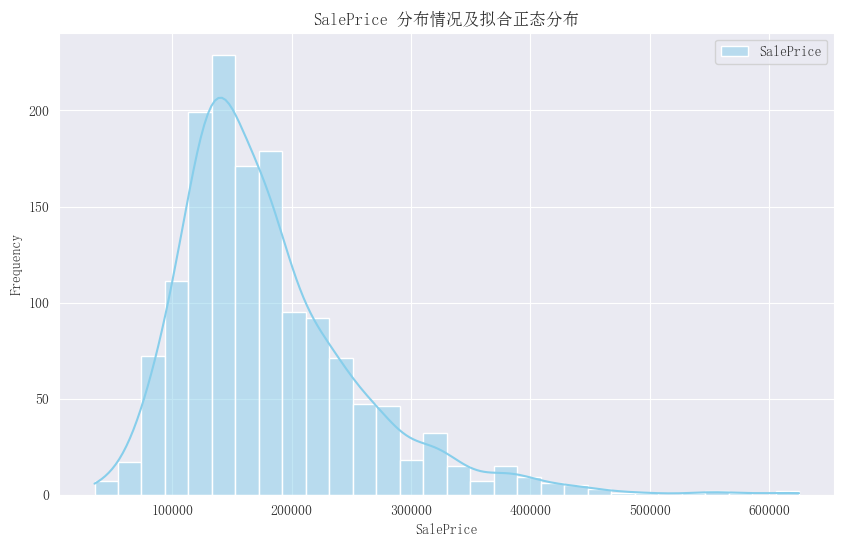

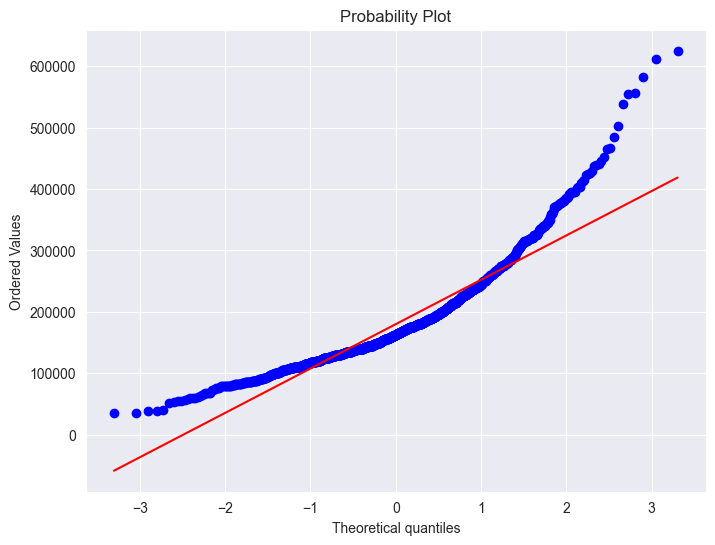

In [18]:
# 查看分布情况
plt.rcParams['font.family'] = 'SimSun' 
sale_price = train_data['SalePrice']
mu, sigma = norm.fit(sale_price)

plt.figure(figsize=(10, 6))
sns.histplot(sale_price, kde=True, bins=30, color='skyblue', label='SalePrice')

plt.title('SalePrice 分布情况及拟合正态分布')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()

plt.show()

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(8, 6))
stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)

# 添加标题和标签
plt.title('Probability Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# 显示图形
plt.show()

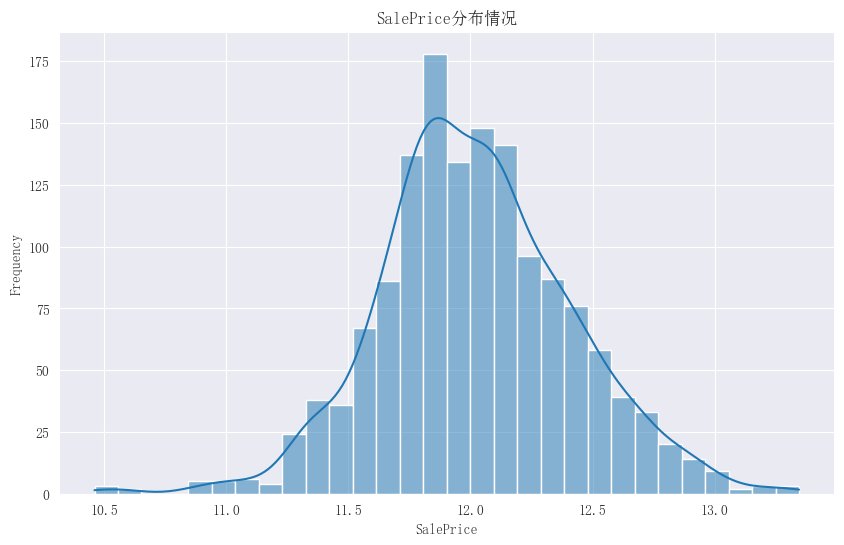

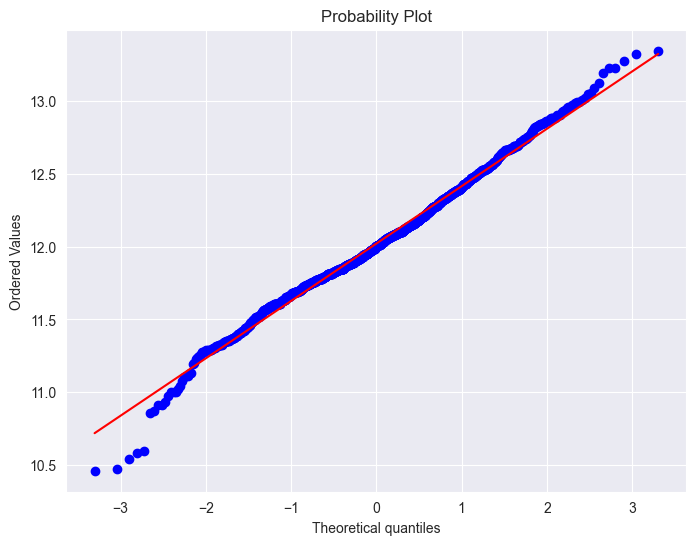

In [19]:
# 变换成无偏的正态分布
train_data["SalePrice"] = np.log1p(train_data["SalePrice"]) # 对数变换

plt.rcParams['font.family'] = 'SimSun' 
plt.figure(figsize=(10, 6))

sns.histplot(train_data['SalePrice'], kde=True, bins=30)

plt.title('SalePrice分布情况')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.show()

plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(8, 6))
stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)

# 添加标题和标签
plt.title('Probability Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')

# 显示图形
plt.show()

训练数据和测试数据合并

In [20]:
all_data_0211443=pd.concat([train_data,test_data],axis=0)
all_data_0211443.reset_index(drop=True, inplace=True)     # 重置索引，使得索引值连续

display(train_data.shape)
display(test_data.shape)
display(all_data_0211443.shape)

(1454, 80)

(1459, 79)

(2913, 80)

In [21]:
all_data_0211443.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


查看各属性列的数据缺失比例

【1】如果缺失的数据过多，可以考虑删除该列特征
【2】用平均值、中值、分位数、众数、随机值等替代。但是效果一般，因为等于人为增加了噪声
【3】用插值法进行拟合
【4】用其他变量做预测模型来算出缺失变量。效果比方法1略好。有一个根本缺陷，如果其他变量和缺失变量无关，则预测的结果无意义
【5】最精确的做法，把变量映射到高维空间。比如性别，有男、女、缺失三种情况，则映射成3个变量：是否男、是否女、是否缺失。但是计算量会加大。

In [22]:
count = all_data_0211443.isnull().sum().sort_values(ascending=False)
ratio = count / len(all_data_0211443)
nulldata = pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[nulldata.ratio>0]

,count,ratio
PoolQC,2905,0.997254
MiscFeature,2808,0.963955
Alley,2715,0.932029
Fence,2344,0.804669
MasVnrType,1763,0.605218
SalePrice,1459,0.500858
FireplaceQu,1420,0.487470
LotFrontage,485,0.166495
GarageFinish,159,0.054583
GarageQual,159,0.054583


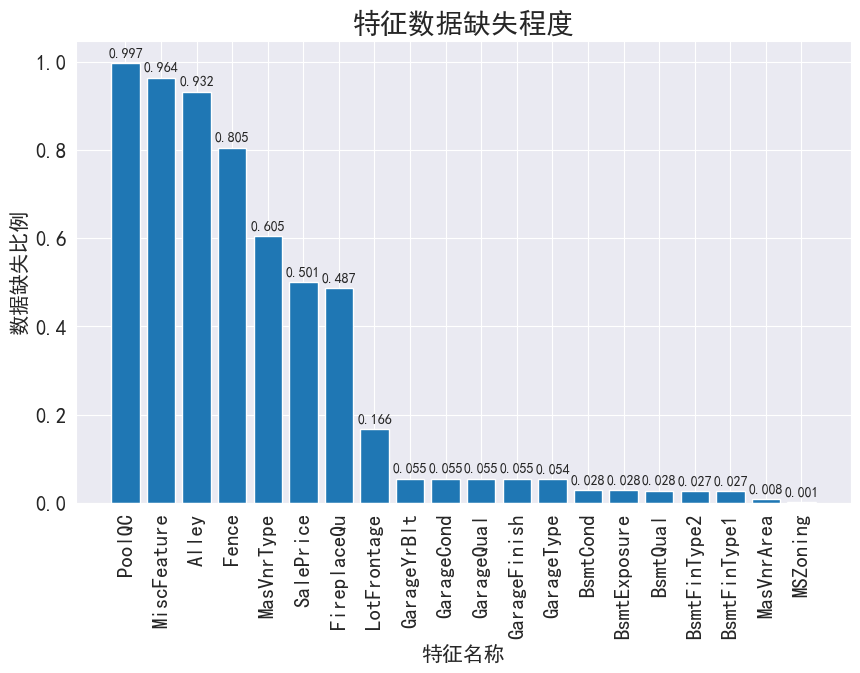

In [23]:
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False

# 只取出比例大于 0.001 的数据
plot_data = ratio[ratio > 0.001]
plot_data = plot_data.sort_values(ascending=False)
plot_data = plot_data[plot_data != 0]

plt.figure(figsize=(10,6))
plt.bar(plot_data.index, plot_data.values)

plt.title("特征数据缺失程度", fontsize=20)
plt.xlabel("特征名称", fontsize=15)
plt.ylabel("数据缺失比例", fontsize=15)

plt.tick_params(labelsize=15)  
plt.xticks(rotation=90)       

for a, b in zip(plot_data.index, plot_data.round(3)):
    plt.text(a, b+0.01, b, ha='center', va='bottom', fontsize=10) 

plt.show() 

缺失值填充


In [24]:
str_cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType", "MSSubClass"]
# PoolQC：泳池质量；MiscFeature :杂项功能未在其他类别中涵盖；Alley : 胡同类型；Fence : 栅栏质量；FireplaceQu :壁炉数量；GarageType : 车库位置；GarageFinish : 车库的内部完成；GarageQual: 车库质量；GarageCond :车库条件；BsmtQual : 评估地下室的高度；BsmtCond :评估地下室的一般状况；BsmtExposure :出口或花园墙壁曝光程度；BsmtFinType1 :地下室完工面积比；BsmtFinType2 :地下室完工面积比；MasVnrType :砌体单板类型；MSSubClass: 建筑类
# 分析这类空缺值可能是由于对应的房屋并没有该属性，所以全部用None填充
for col in str_cols:
    all_data_0211443[col].fillna("None",inplace=True)
    
del str_cols, col

In [25]:
num_cols=["BsmtUnfSF","TotalBsmtSF","BsmtFinSF2","BsmtFinSF1","BsmtFullBath","BsmtHalfBath", \
          "MasVnrArea","GarageCars","GarageArea","GarageYrBlt"]
# BsmtUnfsF :未完成的地下室平方英尺；TotalBsmtSF :地下室总面积；BsmtFinSF1 :类型1完成平方英尺；BsmtFullBath：地下室完整的浴室；BsmtHalfBath：地下室半浴室；MasVnrArea ：单位买诺记的砌体木皮面积；GarageCars: 车容量为单位的车库大小；GarageArea : 以平方英尺为单位的车库大小；GarageYrBlt :车库建成年份
# 分析该类数值属性是由于房屋并没有对应的部件，所以全部用0填充
for col in num_cols:
    all_data_0211443[col].fillna(0, inplace=True)
del num_cols, col

In [26]:
# 众数填充
other_cols = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
# MSZoning：建筑分区；Electrical :电气系统；KitchenQual :厨房质量评估；Exterior1st:房屋外部覆盖物；Exterior2nd:房屋外部覆盖物(不止一种)；SaleType：销售类型
for col in other_cols:
    all_data_0211443[col].fillna(all_data_0211443[col].mode()[0], inplace=True)
    
del other_cols, col

In [27]:
# lotfrontage
# 位于同一街道的相邻的房屋往往具有相同的街区面积属性,使用同一街道的街区面积进行填充
all_data_0211443["LotFrontage"] = all_data_0211443.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [28]:
# Utilities
pd.unique(all_data_0211443["Utilities"].values)


array(['AllPub', 'NoSeWa', nan], dtype=object)

In [29]:
AllPub_nums = 0
NoSeWa_nums = 0
for Utilities_val in all_data_0211443["Utilities"].values:
    if 'AllPub' == Utilities_val:
        AllPub_nums += 1
    elif 'NoSeWa' == Utilities_val:
        NoSeWa_nums += 1
print("AllPub的数量：%d,  NoSeWa的数量：%d,  NaN的数量：%d" 
      %(AllPub_nums, NoSeWa_nums, len(all_data_0211443["Utilities"].values) - AllPub_nums - NoSeWa_nums))

AllPub的数量：2910,  NoSeWa的数量：1,  NaN的数量：2


In [30]:
# Utilities里面几乎所有的值都是AllPub，这样的数据对模型训练和分析没有意思，予以删除。
# # 删除Utilities属性
all_data_0211443 = all_data_0211443.drop(["Utilities"], axis=1)

In [31]:
# functional
all_data_0211443["Functional"] = all_data_0211443["Functional"].fillna("Typ")

In [32]:
count=all_data_0211443.isnull().sum().sort_values(ascending=False)
ratio=count/len(all_data_0211443)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
del count, ratio
nulldata[nulldata.ratio>0]

,count,ratio
SalePrice,1459,0.500858


特征工程

In [33]:
#  顺序特征编码
custom_coding_dict = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'None': 4}

cols = ['BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 'PoolQC']

for col in cols:
    all_data_0211443[col] = all_data_0211443[col].map(custom_coding_dict)


In [34]:
# 类别型特征变量
cols = ['MSSubClass', 'YrSold', 'MoSold', 'OverallCond', "MSZoning", "BsmtFullBath", "BsmtHalfBath", "HalfBath",\
        "Functional", "Electrical", "KitchenQual","KitchenAbvGr", "SaleType", "Exterior1st", "Exterior2nd", "YearBuilt", \
        "YearRemodAdd", "GarageYrBlt","BedroomAbvGr","LowQualFinSF"]
for col in cols:
    all_data_0211443[col] = all_data_0211443[col].astype(str)    
del cols, col

对年份类的数据等进行LabelEncoder编码（由于建造年份 (YearBuilt) 这个特征存在较多的取值 (从1872年到2010年)，直接进行独热编码会造成过于稀疏的数据，并且严重增加特征维度，因此在特征工程中会将其利用LabelEncoder进行数字化编码 ）。

In [35]:
from sklearn.preprocessing import LabelEncoder

## 年份等特征的标签编码
str_cols = ["YearBuilt", "YearRemodAdd", 'GarageYrBlt', "YrSold", 'MoSold']
for col in str_cols:
    all_data_0211443[col] = LabelEncoder().fit_transform(all_data_0211443[col])



In [36]:
all_data_0211443.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,4,None,None,0,4,2,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,4,None,None,0,7,1,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,4,None,None,0,11,2,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,4,None,None,0,4,0,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,4,None,None,0,3,2,WD,Normal,12.429220


数据变换

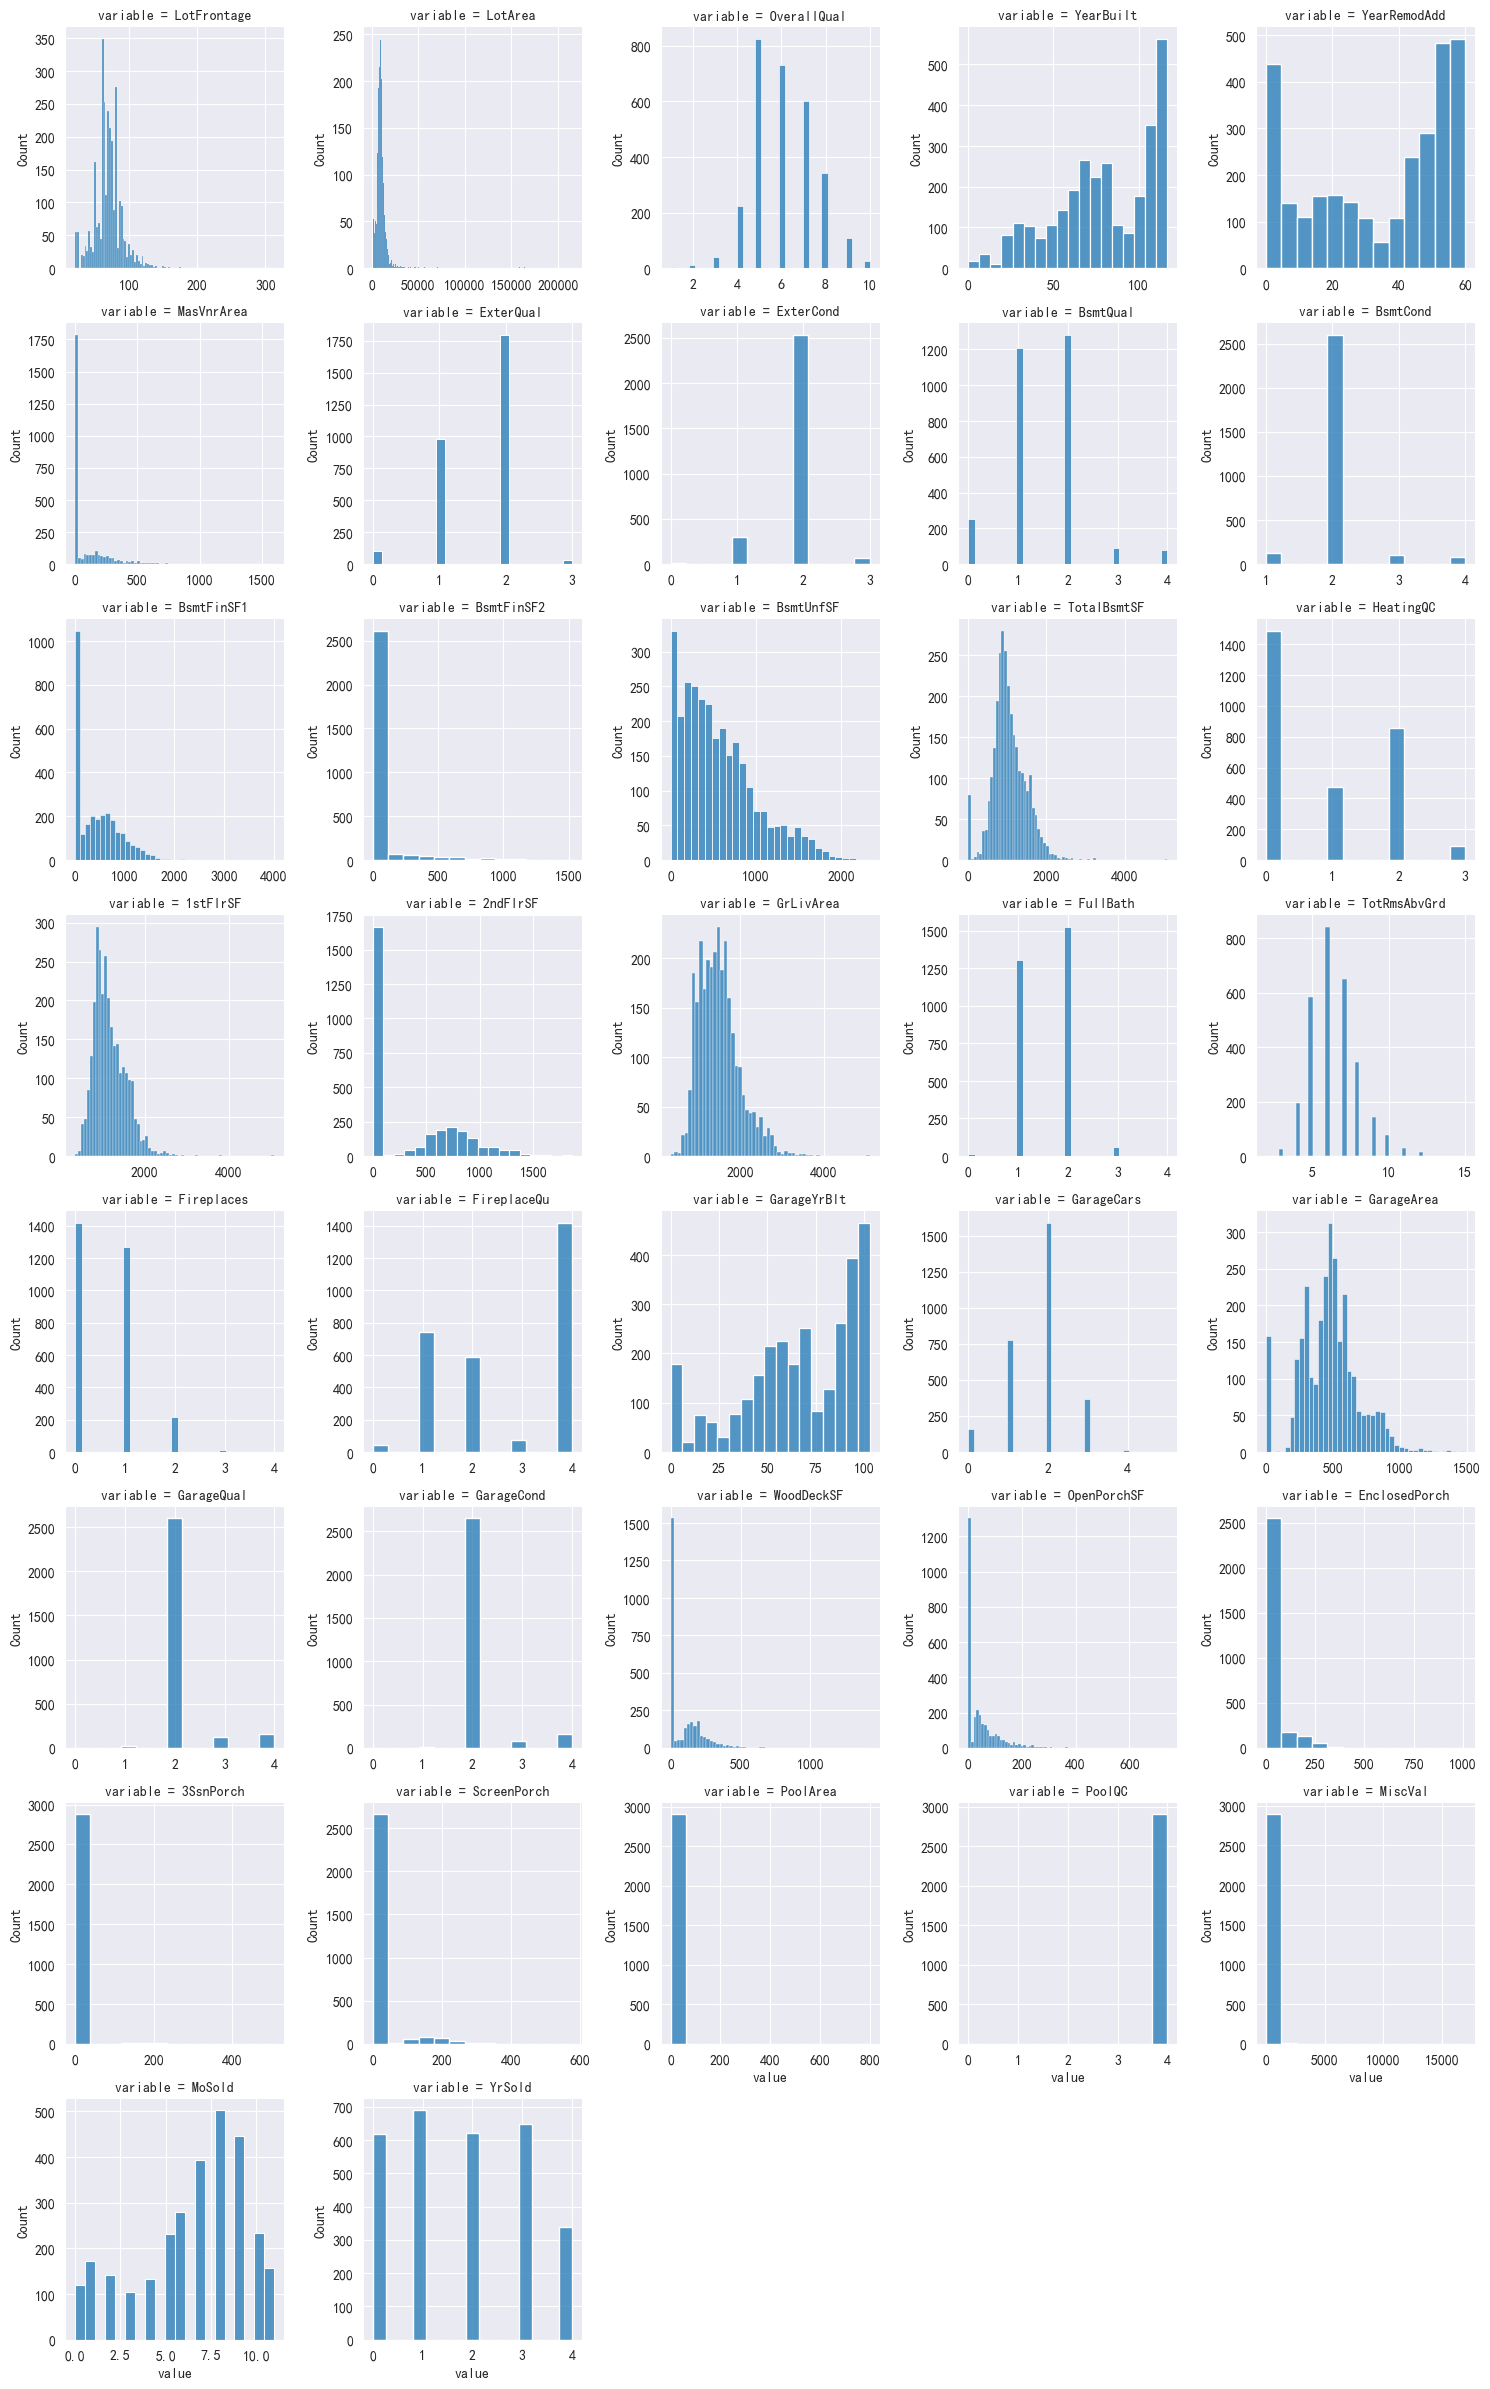

In [37]:
# 绘制每个数值型特征与目标变量的分布情况

num_features = all_data_0211443.select_dtypes(include=['int64','float64','int32']).copy()
num_features.drop(['SalePrice'],axis=1,inplace=True)   # 去掉目标列 'SalePrice'

num_feature_names = list(num_features.columns)

num_features_data = pd.melt(all_data_0211443, value_vars=num_feature_names)
g = sns.FacetGrid(num_features_data, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")
plt.show()


In [38]:
# 计算各数值型特征变量的偏度
from scipy.stats import norm, skew       
skewed_feats = all_data_0211443[num_feature_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[skewness["Skew"].abs()>0.75]

,Skew
MiscVal,21.924619
PoolArea,18.695357
LotArea,13.293764
3SsnPorch,11.364106
BsmtFinSF2,4.141222
EnclosedPorch,3.999248
ScreenPorch,3.930034
GarageCond,3.081384
GarageQual,2.810778
MasVnrArea,2.599625


In [39]:
# 设置阈值为1，对偏度大于阈值的特征进行log函数变换操作以提升质量。
skew_cols = list(skewness[skewness["Skew"].abs()>1].index)
for col in skew_cols:
    all_data_0211443[col] = np.log1p(all_data_0211443[col])  
    
del num_features, num_feature_names, num_features_data, g, skewed_feats, col, skew_cols      # 清除临时变量

In [40]:
all_data_0211443.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,1.609438,None,None,0.0,4,2,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,...,0.0,1.609438,None,None,0.0,7,1,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,...,0.0,1.609438,None,None,0.0,11,2,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,...,0.0,1.609438,None,None,0.0,4,0,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,...,0.0,1.609438,None,None,0.0,3,2,WD,Normal,12.429220


In [41]:
all_data_0211443.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2913 non-null   object 
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2913 non-null   float64
 3   LotArea        2913 non-null   float64
 4   Street         2913 non-null   object 
 5   Alley          2913 non-null   object 
 6   LotShape       2913 non-null   object 
 7   LandContour    2913 non-null   object 
 8   LotConfig      2913 non-null   object 
 9   LandSlope      2913 non-null   object 
 10  Neighborhood   2913 non-null   object 
 11  Condition1     2913 non-null   object 
 12  Condition2     2913 non-null   object 
 13  BldgType       2913 non-null   object 
 14  HouseStyle     2913 non-null   object 
 15  OverallQual    2913 non-null   int64  
 16  OverallCond    2913 non-null   object 
 17  YearBuilt      2913 non-null   int32  
 18  YearRemo

In [42]:
all_data_0211443 = pd.get_dummies(all_data_0211443)       # 独热编码

In [43]:
all_data_0211443.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Columns: 337 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(299), float64(25), int32(5), int64(8)
memory usage: 1.6 MB


In [44]:
all_data_0211443.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,110,53,5.283204,1,1.098612,1,1.098612,...,False,False,False,True,False,False,False,False,True,False
1,4.394449,9.169623,6,83,26,0.000000,2,1.098612,1,1.098612,...,False,False,False,True,False,False,False,False,True,False
2,4.234107,9.328212,7,108,52,5.093750,1,1.098612,1,1.098612,...,False,False,False,True,False,False,False,False,True,False
3,4.110874,9.164401,7,25,20,0.000000,2,1.098612,2,0.693147,...,False,False,False,True,True,False,False,False,False,False
4,4.442651,9.565284,8,107,50,5.860786,1,1.098612,1,1.098612,...,False,False,False,True,False,False,False,False,True,False


特征降维

当前数据中总共有337维特征，这些特征中有部分特征对于后续的模型训练意义不大，因此采用一些方式将这些无意义的特征进行剔除。

In [45]:
# 将数据拆分回训练数据和测试数据

# 处理特征工程过程中可能产生的极个别异常值，用众数填充
cols = list(all_data_0211443.columns)
for col in cols:
    all_data_0211443[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    all_data_0211443[col].fillna(all_data_0211443[col].mode()[0], inplace=True)

train_data = all_data_0211443.iloc[:len(train_data)]
test_data = all_data_0211443.iloc[len(test_data):]

y_train = train_data["SalePrice"]
x_train = train_data.drop(["SalePrice"], axis=1)

x_test = test_data.drop(["SalePrice"], axis=1)


In [46]:
from sklearn.preprocessing import RobustScaler

# 归一化处理
scaler = RobustScaler()
x_train = scaler.fit(x_train).transform(x_train)  #训练样本特征归一化
x_test = scaler.transform(x_test)                 #测试集样本特征归一化  

In [47]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.001)
lasso_model.fit(x_train,y_train)

lasso_params = lasso_model.get_params()
print(lasso_params)


{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [48]:
## 索引和重要性做成dataframe形式
FI_lasso = pd.DataFrame({"Feature Importance":lasso_model.coef_}, index=all_data_0211443.drop(["SalePrice"],axis=1).columns) 
## 由高到低进行排序
FI_lasso.sort_values("Feature Importance",ascending=False).round(5)    

,Feature Importance
OverallQual,0.11887
GrLivArea,0.10677
Neighborhood_Crawfor,0.09845
Functional_Typ,0.06668
YearBuilt,0.05952
...,...
CentralAir_N,-0.05264
OverallCond_4,-0.05644
SaleCondition_Abnorml,-0.06386
OverallCond_3,-0.13513


(336, 1)

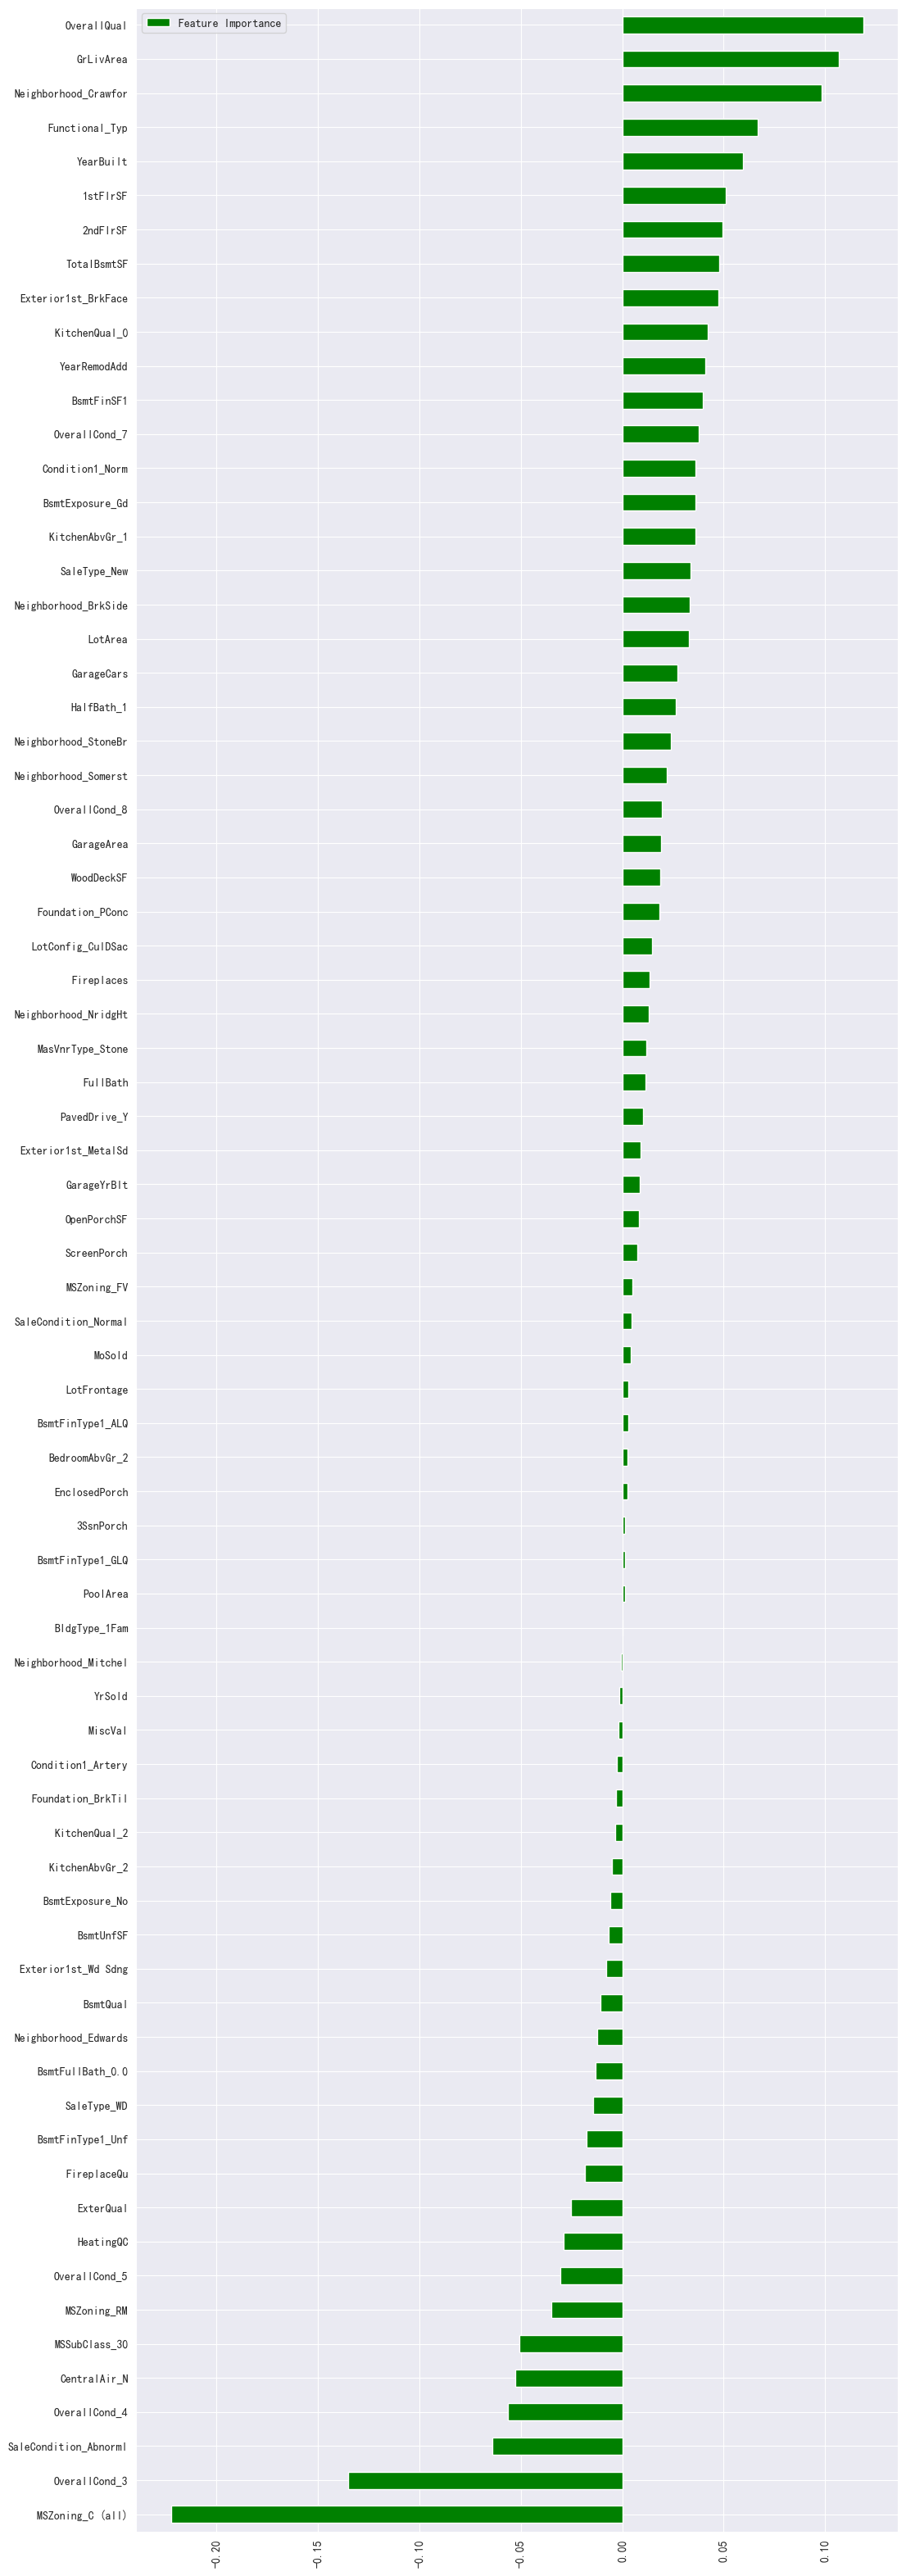

In [49]:
# 特征选择
# 获取重要程度大于0的系数指标
display(FI_lasso.shape)

FI_lasso[FI_lasso["Feature Importance"] !=0 ].sort_values("Feature Importance").plot(kind="barh",figsize=(12,40), color='g')
plt.xticks(rotation=90)
plt.show()                  

FI_index = FI_lasso.index
FI_val = FI_lasso["Feature Importance"].values
FI_lasso = pd.DataFrame(FI_val, columns = ['Feature Importance'], index = FI_index)


In [50]:
final_cols = FI_lasso.index.tolist()
final_cols.append("SalePrice")
final_data_0211443 = all_data_0211443[final_cols].copy()
# del all_data

In [51]:
final_data_0211443.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,4.189655,9.042040,7,110,53,5.283204,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.247699
1,4.394449,9.169623,6,83,26,0.000000,2,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.109016
2,4.234107,9.328212,7,108,52,5.093750,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.317171
3,4.110874,9.164401,7,25,20,0.000000,2,1.098612,2,0.693147,...,False,False,True,True,False,False,False,False,False,11.849405
4,4.442651,9.565284,8,107,50,5.860786,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.429220


In [52]:
final_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR

In [53]:
# 将数据拆分回训练数据和测试数据

train_data = final_data_0211443.iloc[:len(train_data)]
test_data = final_data_0211443.iloc[len(test_data):]

# 提取训练集的目标值和特征变量
y_train = train_data["SalePrice"]
x_train = train_data.drop(["SalePrice"], axis=1)

# 提取测试集的特征变量
x_test = test_data.drop(["SalePrice"], axis=1)

from sklearn.preprocessing import RobustScaler

# 归一化处理
scaler = RobustScaler()
x_train = scaler.fit(x_train).transform(x_train)  #训练样本特征归一化
x_test = scaler.transform(x_test)

In [54]:
train_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,4.189655,9.042040,7,110,53,5.283204,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.247699
1,4.394449,9.169623,6,83,26,0.000000,2,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.109016
2,4.234107,9.328212,7,108,52,5.093750,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.317171
3,4.110874,9.164401,7,25,20,0.000000,2,1.098612,2,0.693147,...,False,False,True,True,False,False,False,False,False,11.849405
4,4.442651,9.565284,8,107,50,5.860786,1,1.098612,1,1.098612,...,False,False,True,False,False,False,False,True,False,12.429220


In [55]:
from sklearn.decomposition import PCA

# 主成分分析
pca_model = PCA(n_components=335)
x_train = pca_model.fit_transform(x_train)
x_test = pca_model.transform(x_test)

In [63]:

x_train_df = pd.DataFrame(x_train)

y_train_df = pd.DataFrame(y_train, columns=['SalePrice'])

x_train_df['SalePrice'] = y_train_df

x_test_df = pd.DataFrame(x_test)

x_train_df.to_csv('0211443_train.csv', index=False)
x_test_df.to_csv('0211443_test.csv', index=False)

SVR模型核函数
线性核（Linear Kernel）： 线性核函数在特征空间中执行线性映射，适用于特征之间线性相关性较强的情况。
多项式核（Polynomial Kernel）： 多项式核函数在特征空间中执行多项式映射，通过调节多项式的阶数可以增加模型的复杂度，适用于特征之间存在非线性关系的情况。
径向基核（Radial Basis Function Kernel，简称RBF Kernel）： RBF核函数是SVR模型中最常用的核函数之一，它在特征空间中执行非线性映射，具有较强的拟合能力和泛化能力，通常也是默认选择的核函数。
Sigmoid核（Sigmoid Kernel）： Sigmoid核函数在特征空间中执行S型映射，适用于特征之间呈现出类似于Sigmoid函数形状的关系的情况。

In [57]:
# 使用 scikit-learn 中的 GridSearchCV 对 SVR（支持向量回归）模型进行超参数调优（网格搜索）。
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# 定义参数网格
param_grid = {
    'C':[11,12,13,14,15],
    'kernel':["rbf","linear"],
    "gamma":[0.0003,0.0004],
    "epsilon":[0.008,0.009]
}

svr = SVR()

# 5折交叉验证
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 

grid_search.fit(x_train, y_train)

# 访问具有最佳超参数的最佳模型
best_model = grid_search.best_estimator_

print("最佳超参数:", grid_search.best_params_)


最佳超参数: {'C': 15, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}


建模

In [58]:
from sklearn.svm import SVR

# 使用最佳参数实例化SVR模型
best_svr_model = SVR(C=15, kernel='rbf', gamma=0.0004, epsilon=0.009)

best_svr_model.fit(x_train, y_train.ravel())

# 使用训练好的模型对测试数据集进行预测
y_pred = best_svr_model.predict(x_test)


In [59]:
# 将对数值还原为原始值
y_pred = np.exp(y_pred)

ResultData = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
ResultData['Id'] = ResultData['Id'].astype('int')
ResultData.to_csv('0211443-submission.csv', index=False)


In [60]:
ResultData

,Id,SalePrice
0,1461,121951.052516
1,1462,164509.035432
2,1463,192589.869175
3,1464,196824.309301
4,1465,190924.470344
...,...,...
1454,2915,85957.434917
1455,2916,80573.262213
1456,2917,174156.628881
1457,2918,124998.865987


In [66]:
train_file_path_wgh = "D:\pythonProject\财经数据分析实践\wgh_train.csv"
test_file_path_wgh = "D:\pythonProject\财经数据分析实践\wgh_test.csv"

train_data_wgh = pd.read_csv(train_file_path_wgh)
test_data_wgh = pd.read_csv(test_file_path_wgh)

y_train_wgh = train_data_wgh["SalePrice"]
x_train_wgh = train_data_wgh.drop(["SalePrice"], axis=1)

# 提取测试集的特征变量
x_test_wgh = test_data_wgh#.drop(["SalePrice"], axis=1)

# 归一化处理
scaler = RobustScaler()
x_train_wgh = scaler.fit(x_train_wgh).transform(x_train_wgh)  #训练样本特征归一化
x_test_wgh = scaler.transform(x_test_wgh)


In [68]:
best_svr_model = SVR(C=15, kernel='rbf', gamma=0.0004, epsilon=0.009)

best_svr_model.fit(x_train_wgh, y_train_wgh.ravel())

# 使用训练好的模型对测试数据集进行预测
y_pred_wgh = best_svr_model.predict(x_test_wgh)

# 将对数值还原为原始值
y_pred_wgh = np.exp(y_pred_wgh)

ResultData = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred_wgh})
ResultData['Id'] = ResultData['Id'].astype('int')
ResultData.to_csv('_wgh-submission.csv', index=False)

In [88]:
train_file_path_ljx = "D:\pythonProject\财经数据分析实践\\train_随机森林.csv"
test_file_path_ljx = "D:\pythonProject\财经数据分析实践\\test_随机森林.csv"

train_data_ljx = pd.read_csv(train_file_path_ljx)
test_data_ljx = pd.read_csv(test_file_path_ljx)

y_train_ljx = train_data_ljx["SalePrice"]
x_train_ljx = train_data_ljx.drop(["Id","SalePrice"], axis=1)

# 提取测试集的特征变量
x_test_ljx = test_data_ljx.drop(["Id"], axis=1)

# 归一化处理
scaler = RobustScaler()
x_train_ljx = scaler.fit(x_train_ljx).transform(x_train_ljx)  #训练样本特征归一化
x_test_ljx = scaler.transform(x_test_ljx)

pca_model = PCA(n_components=265)
x_train_ljx = pca_model.fit_transform(x_train_ljx)
x_test_ljx = pca_model.transform(x_test_ljx)

best_svr_model = SVR(C=15, kernel='rbf', gamma=0.0004, epsilon=0.009)

best_svr_model.fit(x_train_ljx, y_train_ljx.ravel())

# 使用训练好的模型对测试数据集进行预测
y_pred_ljx = best_svr_model.predict(x_test_ljx)

# 将对数值还原为原始值
# y_pred_ljx = np.exp(y_pred_ljx)

ResultData = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred_ljx})
ResultData['Id'] = ResultData['Id'].astype('int')
ResultData.to_csv('_ljx-submission.csv', index=False)

In [82]:
train_file_path_yj = "D:\pythonProject\财经数据分析实践\\0211437_train.csv"
test_file_path_yj = "D:\pythonProject\财经数据分析实践\\0211437_test.csv"

train_data_yj = pd.read_csv(train_file_path_yj)
test_data_yj = pd.read_csv(test_file_path_yj)

y_train_yj = train_data_yj["SalePrice"]
x_train_yj = train_data_yj.drop(["SalePrice"], axis=1)

# 提取测试集的特征变量
x_test_yj = test_data_yj#.drop(["SalePrice"], axis=1)

# 归一化处理
scaler = RobustScaler()
x_train_yj = scaler.fit(x_train_yj).transform(x_train_yj)  #训练样本特征归一化
x_test_yj = scaler.transform(x_test_yj)

best_svr_model = SVR(C=15, kernel='rbf', gamma=0.0004, epsilon=0.009)

best_svr_model.fit(x_train_yj, y_train_yj.ravel())

# 使用训练好的模型对测试数据集进行预测
y_pred_yj = best_svr_model.predict(x_test_yj)

# 将对数值还原为原始值
y_pred_yj = np.exp(y_pred_yj)

ResultData = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred_yj})
ResultData['Id'] = ResultData['Id'].astype('int')
ResultData.to_csv('_yj-submission.csv', index=False)